In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from lightgbm import LGBMRegressor

sns.set()


In [2]:
data_discount = pd.read_csv('data_discount.csv')
data_bogo = pd.read_csv('data_bogo.csv')


### Discount Model

In [3]:
data_discount.head()

,Unnamed: 0,recency,hist_spend,past_discount,past_bogo,Surburban,Urban,is_referral,Web,store,offer,conversion
0,1,6,329.08,1,1,0,0,1,1,0,0,0
1,3,9,675.83,1,0,0,0,1,1,0,1,0
2,8,9,675.07,1,1,0,0,1,0,1,1,0
3,13,2,101.64,0,1,0,1,0,1,0,1,1
4,14,4,241.42,0,1,0,0,1,0,0,0,0


In [4]:
data_discount.columns.values

array(['Unnamed: 0', 'recency', 'hist_spend', 'past_discount',
       'past_bogo', 'Surburban', 'Urban', 'is_referral', 'Web', 'store',
       'offer', 'conversion'], dtype=object)

In [5]:
data_discount = data_discount.drop('Unnamed: 0', axis=1)
data_discount_target = data_discount['conversion']
data_discount = data_discount.drop('conversion', axis=1)

In [6]:
data_discount_target

0        0
1        0
2        0
3        1
4        0
        ..
42608    0
42609    0
42610    0
42611    0
42612    0
Name: conversion, Length: 42613, dtype: int64

In [7]:
data_discount.head()

,recency,hist_spend,past_discount,past_bogo,Surburban,Urban,is_referral,Web,store,offer
0,6,329.08,1,1,0,0,1,1,0,0
1,9,675.83,1,0,0,0,1,1,0,1
2,9,675.07,1,1,0,0,1,0,1,1
3,2,101.64,0,1,0,1,0,1,0,1
4,4,241.42,0,1,0,0,1,0,0,0


In [8]:
s_learn_discount = LGBMRegressor()
s_learn_discount.fit(data_discount, data_discount_target)

LGBMRegressor()

In [9]:
with_treatment_discount = data_discount.assign(offer=1)

with_treatment_predict_discount = s_learn_discount.predict(with_treatment_discount)

without_treatment_discount = data_discount.assign(offer=0)

without_treatment_predict_discount = s_learn_discount.predict(without_treatment_discount)

In [10]:
ite_discount = with_treatment_predict_discount - without_treatment_predict_discount

ite_discount_df = pd.DataFrame({'ITE_Discount': ite_discount, 'with_treatment_predict':with_treatment_predict_discount, 
                      'without_treatment_predict': without_treatment_predict_discount})
ite_discount_df

,ITE_Discount,with_treatment_predict,without_treatment_predict
0,0.030422,0.391780,0.361359
1,0.027558,0.119514,0.091957
2,0.029003,0.185339,0.156336
3,0.072897,0.231642,0.158745
4,0.077294,0.196646,0.119352
...,...,...,...
42608,0.064187,0.163109,0.098922
42609,0.060382,0.181897,0.121515
42610,0.023562,0.065083,0.041521
42611,0.044430,0.062605,0.018176


array([[<AxesSubplot:title={'center':'ITE_Discount'}>]], dtype=object)

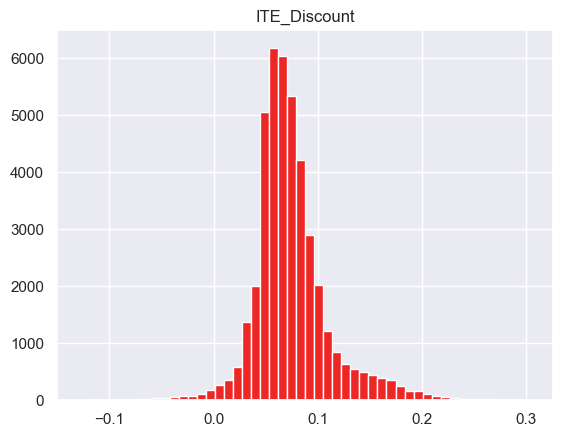

In [11]:
ite_discount_df.hist(column='ITE_Discount', bins=50, grid=True, color='#ED2626')

In [12]:
ite_discount_df.describe()

,ITE_Discount,with_treatment_predict,without_treatment_predict
count,42613.000000,42613.000000,42613.000000
mean,0.074541,0.181651,0.107110
std,0.035678,0.073391,0.058771
min,-0.128431,-0.048313,-0.022256
25%,0.053980,0.135089,0.065086
50%,0.069103,0.173532,0.104001
75%,0.088005,0.216829,0.137769
max,0.304443,0.612872,0.536478


In [13]:
ATE_discount = ite_discount.mean()
ATE_discount

0.07454085367700333

In [14]:
from causalml.inference.meta import LRSRegressor, BaseSRegressor
from xgboost import XGBRegressor

In [15]:
causalml_discount = data_discount.copy()
discount_treatment = data_discount['offer']
causalml_discount = causalml_discount.drop('offer', axis=1)

In [16]:
causalml_discount.head()

,recency,hist_spend,past_discount,past_bogo,Surburban,Urban,is_referral,Web,store
0,6,329.08,1,1,0,0,1,1,0
1,9,675.83,1,0,0,0,1,1,0
2,9,675.07,1,1,0,0,1,0,1
3,2,101.64,0,1,0,1,0,1,0
4,4,241.42,0,1,0,0,1,0,0


In [17]:
discount_treatment.head()

0    0
1    1
2    1
3    1
4    0
Name: offer, dtype: int64

#### Using different model to verify

In [18]:
causalml_regressor = LRSRegressor()
estimated_ate = causalml_regressor.estimate_ate(causalml_discount, 
                                                discount_treatment, data_discount_target)

In [19]:
estimated_ate

(array([0.07605926]), array([0.0695194]), array([0.08259913]))

In [34]:
c_d = XGBRegressor()
e = c_d.estimate_ate(causalml_discount, discount_treatment, data_discount_target)

AttributeError: 'XGBRegressor' object has no attribute 'estimate_ate'

### Bogo Model

In [20]:
data_bogo.head()

,Unnamed: 0,recency,hist_spend,past_discount,past_bogo,Surburban,Urban,is_referral,Web,store,offer,conversion
0,0,10,142.44,1,0,1,0,0,0,1,1,0
1,1,6,329.08,1,1,0,0,1,1,0,0,0
2,2,7,180.65,0,1,1,0,1,1,0,1,0
3,4,2,45.34,1,0,0,1,0,1,0,1,0
4,5,6,134.83,0,1,1,0,0,0,1,1,1


In [21]:
#trimming out useless column
data_bogo = data_bogo.drop('Unnamed: 0', axis=1)
data_bogo_target = data_bogo['conversion'] #create new data frame with outcomes
data_bogo = data_bogo.drop('conversion', axis=1) #removing outcomes from dataset

In [22]:
data_bogo.head()

,recency,hist_spend,past_discount,past_bogo,Surburban,Urban,is_referral,Web,store,offer
0,10,142.44,1,0,1,0,0,0,1,1
1,6,329.08,1,1,0,0,1,1,0,0
2,7,180.65,0,1,1,0,1,1,0,1
3,2,45.34,1,0,0,1,0,1,0,1
4,6,134.83,0,1,1,0,0,0,1,1


In [23]:
s_learn_bogo = LGBMRegressor()
s_learn_bogo.fit(data_bogo, data_bogo_target)

LGBMRegressor()

In [24]:
with_treatment_bogo = data_bogo.assign(offer=1)

with_treatment_predict_bogo = s_learn_bogo.predict(with_treatment_bogo)

without_treatment_bogo = data_bogo.assign(offer=0)

without_treatment_predict_bogo = s_learn_bogo.predict(without_treatment_bogo)

In [25]:
ite_bogo = with_treatment_predict_bogo - without_treatment_predict_bogo

ite_bogo_df = pd.DataFrame({'ITE_Bogo': ite_bogo, 'with_treatment_predict':with_treatment_predict_bogo, 
                      'without_treatment_predict': without_treatment_predict_bogo})
ite_bogo_df

,ITE_Bogo,with_treatment_predict,without_treatment_predict
0,0.015900,0.091804,0.075904
1,-0.025442,0.224723,0.250166
2,0.069831,0.124872,0.055041
3,0.005419,0.153457,0.148038
4,0.063177,0.166491,0.103314
...,...,...,...
42688,0.068615,0.248856,0.180241
42689,0.076252,0.153951,0.077700
42690,0.010775,0.097927,0.087152
42691,0.043727,0.178721,0.134994


array([[<AxesSubplot:title={'center':'ITE_Bogo'}>]], dtype=object)

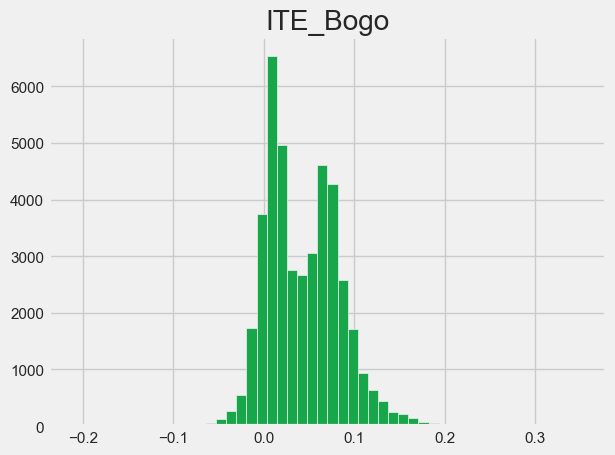

In [26]:
ite_bogo_df.hist(column='ITE_Bogo', bins=50, grid=True, color='#17A74A')

In [27]:
ite_bogo_df.describe()

,ITE_Bogo,with_treatment_predict,without_treatment_predict
count,42693.000000,42693.000000,42693.000000
mean,0.043751,0.150506,0.106755
std,0.042631,0.068950,0.058303
min,-0.209450,-0.031977,-0.059047
25%,0.010107,0.103690,0.066577
50%,0.039484,0.138148,0.101649
75%,0.072234,0.188219,0.138361
max,0.350370,0.585409,0.511771


In [28]:
ATE_bogo = ite_bogo.mean()
ATE_bogo

0.043751250004508566

#### Using different function/model to verify findings

In [29]:
causalml_bogo = data_bogo.copy()
bogo_treatment = data_bogo['offer']
causalml_bogo = causalml_bogo.drop('offer', axis=1)

In [30]:
causalml_bogo.head()

,recency,hist_spend,past_discount,past_bogo,Surburban,Urban,is_referral,Web,store
0,10,142.44,1,0,1,0,0,0,1
1,6,329.08,1,1,0,0,1,1,0
2,7,180.65,0,1,1,0,1,1,0
3,2,45.34,1,0,0,1,0,1,0
4,6,134.83,0,1,1,0,0,0,1


In [31]:
causalml_bogo.head()

,recency,hist_spend,past_discount,past_bogo,Surburban,Urban,is_referral,Web,store
0,10,142.44,1,0,1,0,0,0,1
1,6,329.08,1,1,0,0,1,1,0
2,7,180.65,0,1,1,0,1,1,0
3,2,45.34,1,0,0,1,0,1,0
4,6,134.83,0,1,1,0,0,0,1


In [32]:
causalml_regressor_bogo = LRSRegressor()
estimated_ate_bogo = causalml_regressor_bogo.estimate_ate(causalml_bogo, 
                                                bogo_treatment, data_bogo_target)

In [33]:
estimated_ate_bogo

(array([0.04540912]), array([0.03915388]), array([0.05166435]))